In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import glob
import re

### Define parameters

In [2]:
# define the year of the true image
base_year = '2005_2007'
target_year = '2017_2019'

In [3]:
# get the landscape metric df
img_each_city = glob.glob(f'../Data/Result_csv/*{base_year}_{target_year}_masked*')
real_img_city = glob.glob(f'../Data/Result_csv/True_*{target_year}_masked*')

##### Get the landscapte metrics

In [4]:
def get_metric_df(path_list):

    # compute landscapte metrics
    landscapte_metrics = {}
    count = {}

    for csv in path_list:

        # get name
        reg = re.compile(r'\\(True_img_|no_distance_)(.*?)(_\d{4}_\d{4})+')
        name = reg.findall(csv)[0][1]

        # read csv as df
        df = pd.read_csv(csv)
        df = df[df['class_val']==1]

        # put value to dict 
        std = df.std()
        mean = df.mean()

        landscapte_metrics[(name,'STD')] = std
        landscapte_metrics[(name,'Mean')] = mean
        count[name] = [len(df)]
        
    # put aggregated value to a df
    landscapte_metrics_df = pd.DataFrame(landscapte_metrics).T
    landscapte_metrics_df = landscapte_metrics_df.reset_index()
    landscapte_metrics_df.columns =  ['name','metric_type'] + list(landscapte_metrics_df.columns)[2:]
    landscapte_metrics_df = landscapte_metrics_df.drop(['patch_id', 'class_val'], axis=1)
    
    df_count = pd.DataFrame(count).T
    df_count = df_count.reset_index()
    df_count.columns = ['name','count']
        
    return landscapte_metrics_df,df_count


In [5]:
# get landscapte metrics
landscapte_metrics_pred, landscapte_count_pred = get_metric_df(img_each_city)
landscapte_metrics_real, landscapte_count_real = get_metric_df(real_img_city)

In [12]:
# merge dfs
landscape_metrics_merge = pd.merge(left=landscapte_metrics_real,
                                 right=landscapte_metrics_pred,
                                 left_on=['name','metric_type'],
                                 right_on=['name','metric_type'],
                                 suffixes=['_real','_pred'])

landscapte_count_merge = pd.merge(left=landscapte_count_real,
                                  right=landscapte_count_pred,
                                  left_on=['name'],
                                  right_on=['name'],
                                  suffixes=['_real','_pred'])

In [18]:
# save df to disk
# landscape_metrics_merge.to_csv('./Variables/landscape_metrics_merge.csv',index=False)
# landscapte_count_merge.to_csv('./Variables/landscapte_count_merge.csv',index=False)

landscape_metrics_merge = pd.read_csv('./Variables/landscape_metrics_merge.csv')
landscapte_count_merge = pd.read_csv('./Variables/landscapte_count_merge.csv')

In [19]:
landscape_metrics_merge

,name,metric_type,area_real,perimeter_real,perimeter_area_ratio_real,shape_index_real,fractal_dimension_real,area_pred,perimeter_pred,perimeter_area_ratio_pred,shape_index_pred,fractal_dimension_pred
0,an_qing_shi,STD,5.134110,1171.857271,312.360863,0.401880,0.052686,15.527239,4028.636968,265.669982,0.775379,0.076204
1,an_qing_shi,Mean,0.508394,319.713786,1172.547465,1.178764,1.038844,0.839433,521.792808,1228.498830,1.371003,1.061731
2,an_yang_shi,STD,9.128539,1947.587485,342.831223,0.480719,0.053741,9.383745,2656.782840,305.604999,0.742545,0.073391
3,an_yang_shi,Mean,0.774579,399.277778,1128.355645,1.207916,1.042468,0.957975,555.293085,1166.112442,1.377072,1.062247
4,bang_bu_shi,STD,14.173194,2497.503408,345.940714,0.412727,0.049268,12.018341,3276.473143,298.828899,0.795836,0.074458
...,...,...,...,...,...,...,...,...,...,...,...,...
145,zhou_kou_shi,Mean,0.554013,313.392599,1152.375456,1.152341,1.035775,0.497982,358.005033,1213.593928,1.249111,1.047829
146,zhu_ma_dian_shi,STD,15.342626,3985.412219,340.489627,0.481553,0.052188,13.536361,3785.405426,295.849639,0.871608,0.080240
147,zhu_ma_dian_shi,Mean,0.711589,379.518979,1158.049491,1.189495,1.040119,1.019606,641.389099,1169.896618,1.470229,1.073251
148,zi_bo_shi,STD,6.425080,1611.795351,332.186427,0.488907,0.054078,12.373300,2685.133998,301.738711,0.653548,0.065559


In [20]:
landscapte_count_merge

,name,count_real,count_pred
0,an_qing_shi,127394,77077
1,an_yang_shi,45407,36720
2,bang_bu_shi,48342,41719
3,bao_ding_shi,134871,87676
4,bei_jing_shi,114943,66086
...,...,...,...
70,zheng_zhou_shi,86694,50795
71,zhen_jiang_shi,52551,31287
72,zhou_kou_shi,95619,106429
73,zhu_ma_dian_shi,131731,91860


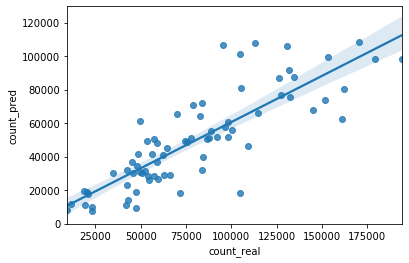

In [21]:
sns.regplot(data=landscapte_count_merge,
                x='count_real',
                y='count_pred')

<AxesSubplot:xlabel='perimeter_area_ratio_real', ylabel='perimeter_area_ratio_pred'>

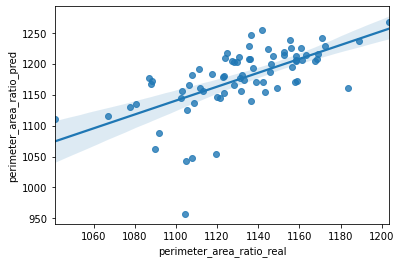

In [17]:
sns.regplot(data=landscape_metrics_merge[landscape_metrics_merge['metric_type']=='Mean'],
                x='perimeter_area_ratio_real',
                y='perimeter_area_ratio_pred')

##### get the accuracy metrics

In [18]:
# get the Acc_df
Acc_df = pd.read_csv(f'./Variables/Acc_df_{base_year}_{target_year}.csv')
Acc_df 

,img_type,city,AUC,Change_ratio,FoM,Hits,Overal_Acc
0,no_distance,an_qing_shi,0.857967,0.683647,0.178629,0.303223,0.941164
1,no_distance,an_yang_shi,0.849310,0.215558,0.198198,0.330892,0.936111
2,no_distance,bang_bu_shi,0.756676,0.411052,0.194033,0.325097,0.916919
3,no_distance,bao_ding_shi,0.853435,0.301170,0.176862,0.300602,0.951364
4,no_distance,bei_jing_shi,0.878886,0.350270,0.147834,0.257625,0.938092
...,...,...,...,...,...,...,...
70,no_distance,zhen_jiang_shi,0.762402,0.430985,0.224263,0.366444,0.850711
71,no_distance,zheng_zhou_shi,0.791188,0.669552,0.275379,0.431920,0.832496
72,no_distance,zhou_kou_shi,0.820692,0.212744,0.176084,0.299541,0.938079
73,no_distance,zhu_ma_dian_shi,0.808465,0.433752,0.182428,0.308658,0.914347


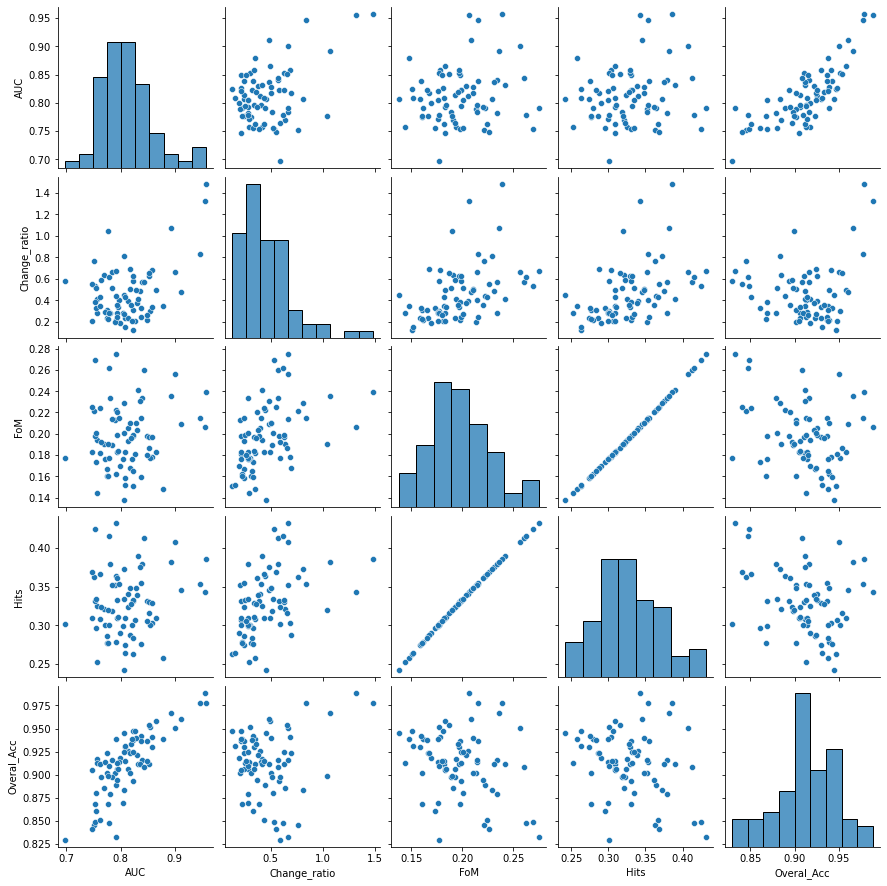

In [20]:
sns.pairplot(data=Acc_df)